# Library & dataset import

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import mlflow
import mlflow.sklearn

In [185]:
df = pd.read_csv("get_around_pricing_project.csv")

# Dataset Overview

In [186]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

Shape: (4843, 15)
Columns: ['Unnamed: 0', 'model_key', 'mileage', 'engine_power', 'fuel', 'paint_color', 'car_type', 'private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires', 'rental_price_per_day']


In [187]:
df.describe(include="all")

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4843.000000,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000
unique,NaN,28,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,NaN,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,NaN,969,NaN,NaN,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,NaN
mean,2421.000000,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.214536
std,1398.198007,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.568268
min,0.000000,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,1210.500000,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,2421.000000,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,3631.500000,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 4843 non-null   int64 
 1   model_key                  4843 non-null   object
 2   mileage                    4843 non-null   int64 
 3   engine_power               4843 non-null   int64 
 4   fuel                       4843 non-null   object
 5   paint_color                4843 non-null   object
 6   car_type                   4843 non-null   object
 7   private_parking_available  4843 non-null   bool  
 8   has_gps                    4843 non-null   bool  
 9   has_air_conditioning       4843 non-null   bool  
 10  automatic_car              4843 non-null   bool  
 11  has_getaround_connect      4843 non-null   bool  
 12  has_speed_regulator        4843 non-null   bool  
 13  winter_tires               4843 non-null   bool  
 14  rental_p

In [189]:
df.sample(20)

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
2041,2041,BMW,135880,85,diesel,black,hatchback,False,False,False,False,False,False,True,94
4035,4035,BMW,112769,120,diesel,grey,suv,True,True,False,True,True,True,True,133
2617,2617,Citroën,161522,135,diesel,brown,sedan,False,True,False,False,False,False,True,115
4403,4403,Nissan,127905,120,diesel,white,suv,False,False,False,False,False,False,False,110
2535,2535,Renault,89667,135,diesel,black,sedan,False,False,False,False,False,False,False,140
4820,4820,Toyota,48380,100,diesel,black,van,True,True,False,False,False,False,True,138
338,338,Renault,164998,85,diesel,black,estate,True,True,False,False,False,False,True,105
2142,2142,Peugeot,75431,135,diesel,grey,hatchback,True,True,True,True,True,True,True,124
1215,1215,Renault,119515,135,diesel,grey,estate,False,True,False,False,True,False,True,141
1887,1887,Mercedes,122904,100,diesel,brown,hatchback,False,True,False,False,False,False,True,109


### Dropping the first column

In [190]:
df = df.drop(columns=['Unnamed: 0'])

In [191]:
df.head()

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


# EDA

### Overview of categorical columns

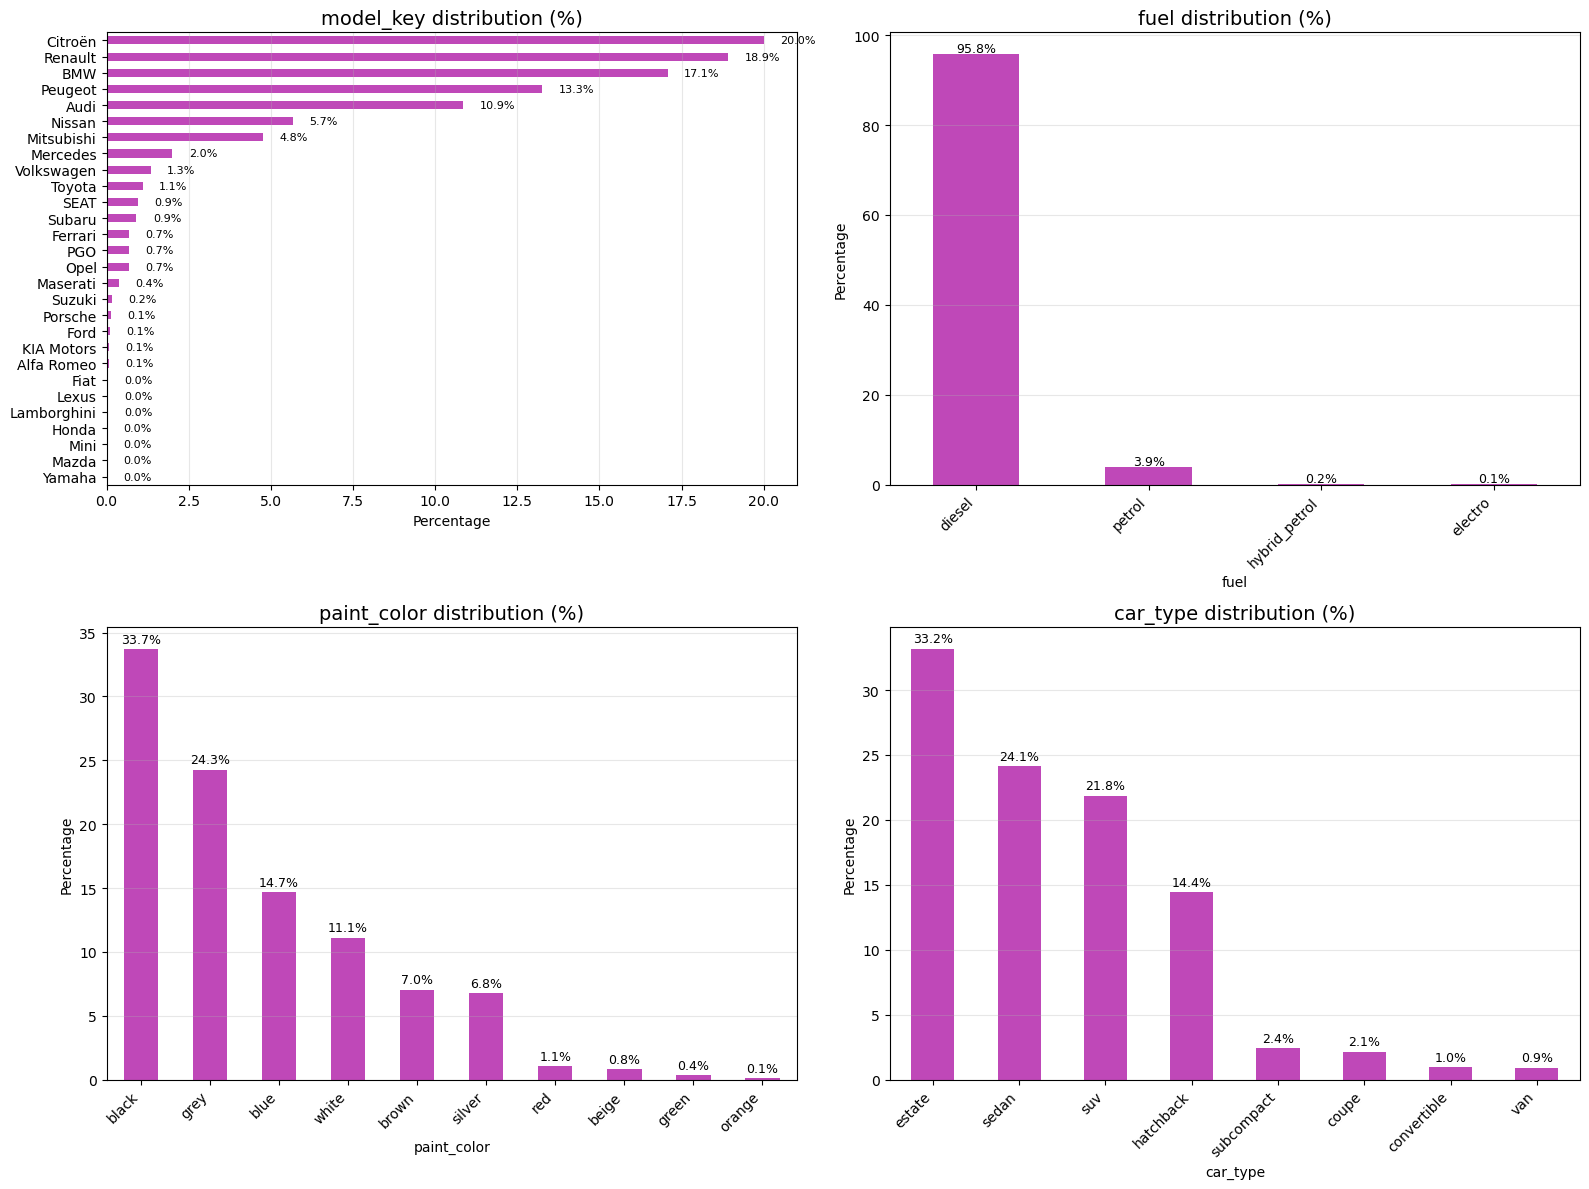

In [192]:
cat_cols = ['model_key', 'fuel', 'paint_color', 'car_type']

plt.figure(figsize=(16, 12))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)

    vc_percent = (
        df[col]
        .value_counts(normalize=True)
        .sort_values(ascending=False) * 100
    )

    # Cas spécial : model_key → graphique horizontal
    if col == 'model_key':
        vc_percent = vc_percent.sort_values(ascending=True)  # petit en bas, gros en haut

        ax = vc_percent.plot(
            kind='barh',
            color='#B01AA7',
            alpha=0.8
        )
        plt.xlabel("Percentage")
        plt.ylabel("")
        plt.grid(axis='x', alpha=0.3)

        # Ajout des % à droite des barres
        for y, v in enumerate(vc_percent):
            plt.text(v + 0.5, y, f"{v:.1f}%", va='center', fontsize=8)

    else:
        ax = vc_percent.plot(
            kind='bar',
            color='#B01AA7',
            alpha=0.8
        )
        plt.ylabel("Percentage")
        plt.grid(axis='y', alpha=0.3)
        plt.xticks(rotation=45, ha="right")

        # Ajout des % au-dessus des barres
        for x, v in enumerate(vc_percent):
            plt.text(x, v + 0.5, f"{v:.1f}%", ha='center', fontsize=9)

    plt.title(f"{col} distribution (%)", fontsize=14)

plt.tight_layout()
plt.show()


### Overview of the distribution of rental price per day

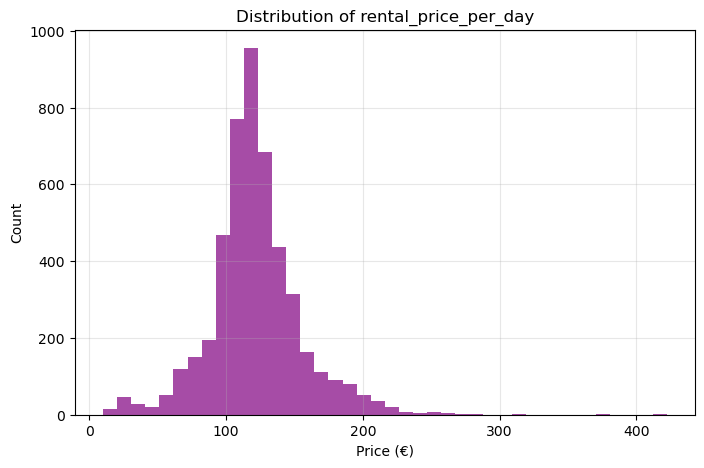

In [193]:
plt.figure(figsize=(8, 5))
plt.hist(df['rental_price_per_day'], bins=40, color='purple', alpha=0.7)
plt.title("Distribution of rental_price_per_day")
plt.xlabel("Price (€)")
plt.ylabel("Count")
plt.grid(alpha=0.3)
plt.show()


### Mileage vs Rental Price

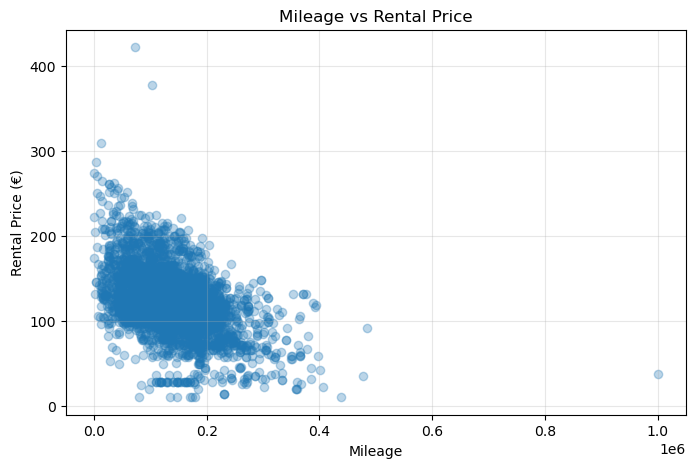

In [194]:
plt.figure(figsize=(8,5))
plt.scatter(df['mileage'], df['rental_price_per_day'], alpha=0.3)
plt.xlabel("Mileage")
plt.ylabel("Rental Price (€)")
plt.title("Mileage vs Rental Price")
plt.grid(alpha=0.3)
plt.show()


### Engine Power vs Rental Price

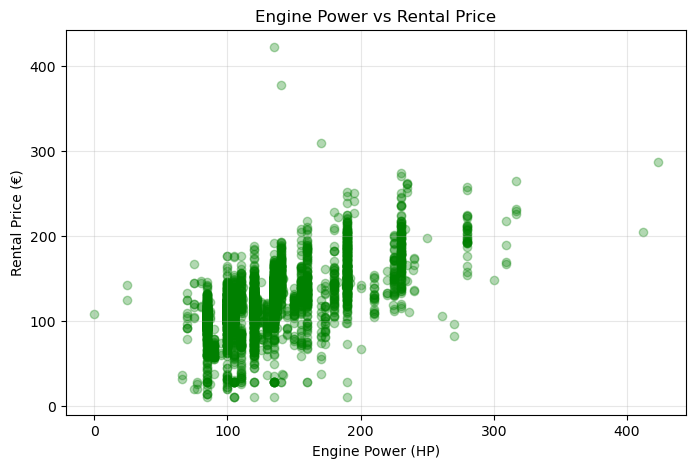

In [195]:
plt.figure(figsize=(8,5))
plt.scatter(df['engine_power'], df['rental_price_per_day'], alpha=0.3, color='green')
plt.xlabel("Engine Power (HP)")
plt.ylabel("Rental Price (€)")
plt.title("Engine Power vs Rental Price")
plt.grid(alpha=0.3)
plt.show()


### Rental Price by Fuel Type

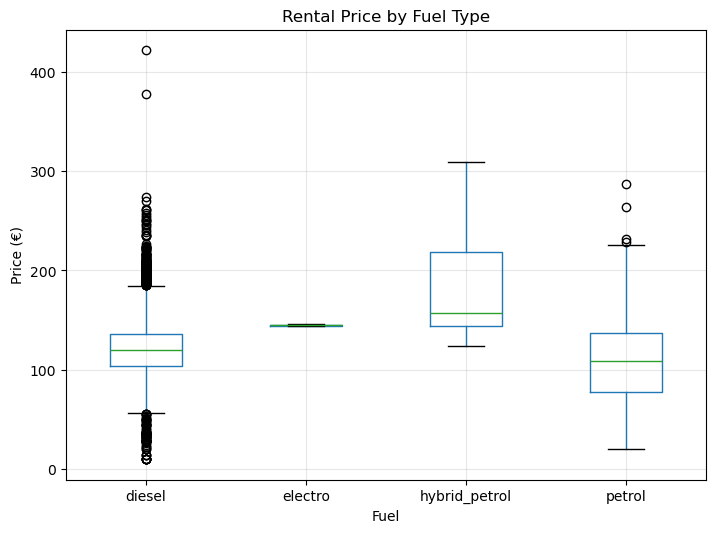

In [196]:
df.boxplot(column='rental_price_per_day', by='fuel', figsize=(8,6))
plt.title("Rental Price by Fuel Type")
plt.suptitle("")
plt.xlabel("Fuel")
plt.ylabel("Price (€)")
plt.grid(alpha=0.3)
plt.show()


### Rental Price by Car Type

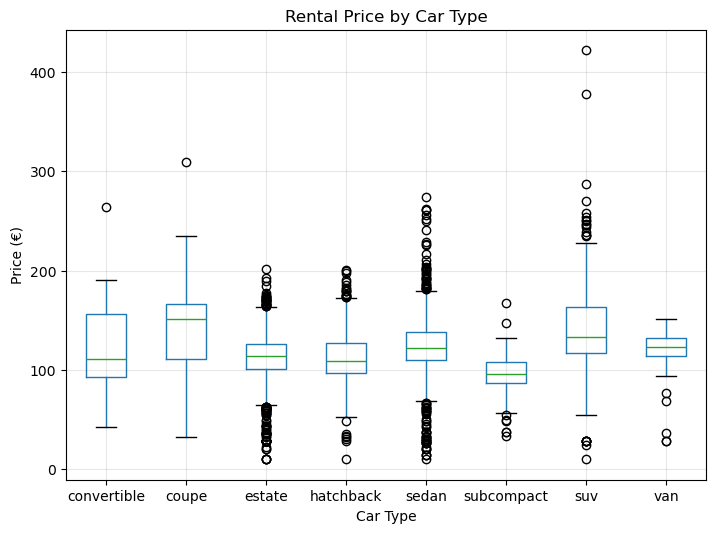

In [197]:
df.boxplot(column='rental_price_per_day', by='car_type', figsize=(8,6))
plt.title("Rental Price by Car Type")
plt.suptitle("")
plt.xlabel("Car Type")
plt.ylabel("Price (€)")
plt.grid(alpha=0.3)
plt.show()


### Impact of car features on rental price

<Figure size 1000x700 with 0 Axes>

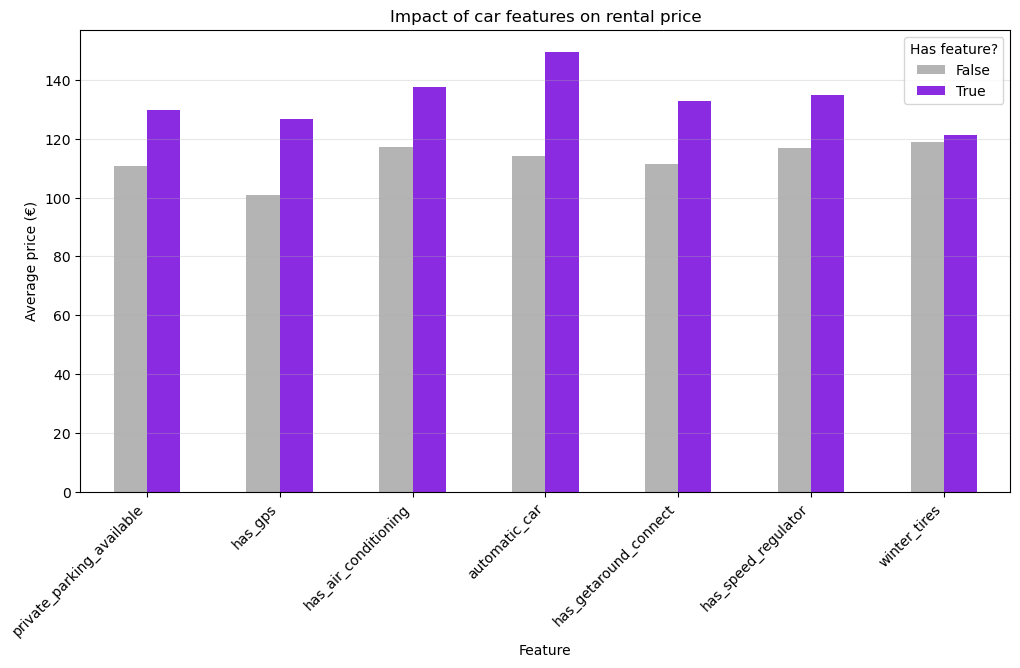

In [198]:
avg_prices = {
    col: df.groupby(col)['rental_price_per_day'].mean()
    for col in bool_cols
}

avg_df = pd.DataFrame(avg_prices).T
avg_df.columns = ['False', 'True']

plt.figure(figsize=(10, 7))
avg_df.plot(kind='bar', figsize=(12,6), color=['#B4B4B4', '#8A2BE2'])
plt.title("Impact of car features on rental price")
plt.ylabel("Average price (€)")
plt.xlabel("Feature")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', alpha=0.3)
plt.legend(title="Has feature?")
plt.show()


# Machine Learning

### Pre-processing

In [199]:
# We only keep useful features + target.

target_col = "rental_price_per_day"

feature_cols = [
    "model_key",
    "mileage",
    "engine_power",
    "fuel",
    "paint_color",
    "car_type",
    "private_parking_available",
    "has_gps",
    "has_air_conditioning",
    "automatic_car",
    "has_getaround_connect",
    "has_speed_regulator",
    "winter_tires",
]

df_clean = df[feature_cols + [target_col]].copy()

df_clean.to_csv("get_around_pricing_project_clean.csv", index=False)

df_clean.head()

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [200]:
# Categorical columns to encode
cat_cols = ["model_key", "fuel", "paint_color", "car_type"]

# One-hot encoding
df_model = pd.get_dummies(
    df_clean,
    columns=cat_cols,
    drop_first=True  # drop one category to avoid perfect multicollinearity
)

df_model.head()
df_model.shape

(4843, 56)

In [201]:
# Export final feature matrix + target used for training
df_model.to_csv("get_around_pricing_project_model.csv", index=False)


In [202]:
df_model.head()

,mileage,engine_power,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day,...,paint_color_red,paint_color_silver,paint_color_white,car_type_coupe,car_type_estate,car_type_hatchback,car_type_sedan,car_type_subcompact,car_type_suv,car_type_van
0,140411,100,True,True,False,False,True,True,True,106,...,False,False,False,False,False,False,False,False,False,False
1,13929,317,True,True,False,False,False,True,True,264,...,False,False,False,False,False,False,False,False,False,False
2,183297,120,False,False,False,False,True,False,True,101,...,False,False,True,False,False,False,False,False,False,False
3,128035,135,True,True,False,False,True,True,True,158,...,True,False,False,False,False,False,False,False,False,False
4,97097,160,True,True,False,False,False,True,True,183,...,False,True,False,False,False,False,False,False,False,False


In [203]:
# Separate features and target
X = df_model.drop(columns=[target_col])
y = df_model[target_col]

X.shape, y.shape

((4843, 55), (4843,))

In [204]:
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3874, 55), (969, 55), (3874,), (969,))

# Machine Learning

## MLflow

In [205]:
# Make sure we use the same experiment
mlflow.set_experiment("getaround_pricing")

def train_and_log_model(model, model_name: str, params: dict):
    """
    Train a regression model, evaluate it on the test set,
    and log everything to MLflow (params, metrics, model).
    """
    with mlflow.start_run() as run:
        print(f"\n=== Training {model_name} ===")
        print("MLflow run id:", run.info.run_id)

        # 1. Log model type + hyperparameters
        mlflow.log_param("model_type", model_name)
        for k, v in params.items():
            mlflow.log_param(k, v)

        # 2. Train
        model.fit(X_train, y_train)

        # 3. Evaluate on test set
        y_pred = model.predict(X_test)

        mae = mean_absolute_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)

        print(f"MAE  : {mae:.2f}")
        print(f"RMSE : {rmse:.2f}")
        print(f"R²   : {r2:.3f}")

        # 4. Log metrics
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("R2", r2)

        # 5. Log model artifact
        mlflow.sklearn.log_model(model, "model")

        print("Run completed.")

    # Return run id and metrics if you want to keep track programmatically
    return run.info.run_id, {"MAE": mae, "RMSE": rmse, "R2": r2}


## LinearRegression

In [206]:
from sklearn.linear_model import LinearRegression

# Define the model
linreg = LinearRegression()

linreg_params = {
    "fit_intercept": True,
    "normalize": False  # deprecated arg in some versions, but we log it just as info
}

linreg_run_id, linreg_metrics = train_and_log_model(
    model=linreg,
    model_name="LinearRegression",
    params=linreg_params
)

print("\nLinearRegression run id:", linreg_run_id)
print("Metrics:", linreg_metrics)


2025/11/29 14:17:43 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



=== Training LinearRegression ===
MLflow run id: 715086ad65064c84bc05a8dc78806003
MAE  : 12.12
RMSE : 17.96
R²   : 0.694


2025/11/29 14:17:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run completed.

LinearRegression run id: 715086ad65064c84bc05a8dc78806003
Metrics: {'MAE': 12.115349412635931, 'RMSE': 17.96050165342624, 'R2': 0.6937216646720405}


## RandomForest

In [207]:
from sklearn.ensemble import RandomForestRegressor

# Simple manual grid of hyperparameters
rf_param_grid = [
    {"n_estimators": 100, "max_depth": 8,  "min_samples_split": 5},
    {"n_estimators": 200, "max_depth": 10, "min_samples_split": 5},
    {"n_estimators": 300, "max_depth": 12, "min_samples_split": 5},
    {"n_estimators": 200, "max_depth": 15, "min_samples_split": 2},
]

rf_runs = []

for i, params in enumerate(rf_param_grid, start=1):
    # Add fixed params
    full_params = {
        **params,
        "random_state": 42,
        "n_jobs": -1
    }

    rf = RandomForestRegressor(**full_params)

    run_id, metrics = train_and_log_model(
        model=rf,
        model_name=f"RandomForestRegressor_v{i}",
        params=full_params
    )

    rf_runs.append((run_id, full_params, metrics))

print("\nSummary of RandomForest runs:")
for run_id, p, m in rf_runs:
    print(f"- run_id={run_id} | params={p} | R2={m['R2']:.3f}, RMSE={m['RMSE']:.2f}")


2025/11/29 14:17:47 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



=== Training RandomForestRegressor_v1 ===
MLflow run id: 8b30aa79756d490084d71218bf4af469
MAE  : 11.74
RMSE : 17.58
R²   : 0.707


2025/11/29 14:17:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run completed.

=== Training RandomForestRegressor_v2 ===
MLflow run id: 210372f951d040c48f33b18ffd37f351


2025/11/29 14:17:50 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


MAE  : 11.09
RMSE : 16.99
R²   : 0.726


2025/11/29 14:17:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run completed.

=== Training RandomForestRegressor_v3 ===
MLflow run id: 97d1735ddf4a498193d7345a21ee07ee


2025/11/29 14:17:53 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


MAE  : 10.77
RMSE : 16.75
R²   : 0.734


2025/11/29 14:17:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run completed.

=== Training RandomForestRegressor_v4 ===
MLflow run id: 6feca370dddd4907ae7912e7da98b541


2025/11/29 14:17:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


MAE  : 10.65
RMSE : 16.70
R²   : 0.735


2025/11/29 14:17:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run completed.

Summary of RandomForest runs:
- run_id=8b30aa79756d490084d71218bf4af469 | params={'n_estimators': 100, 'max_depth': 8, 'min_samples_split': 5, 'random_state': 42, 'n_jobs': -1} | R2=0.707, RMSE=17.58
- run_id=210372f951d040c48f33b18ffd37f351 | params={'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 5, 'random_state': 42, 'n_jobs': -1} | R2=0.726, RMSE=16.99
- run_id=97d1735ddf4a498193d7345a21ee07ee | params={'n_estimators': 300, 'max_depth': 12, 'min_samples_split': 5, 'random_state': 42, 'n_jobs': -1} | R2=0.734, RMSE=16.75
- run_id=6feca370dddd4907ae7912e7da98b541 | params={'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 2, 'random_state': 42, 'n_jobs': -1} | R2=0.735, RMSE=16.70


## GradientBoostingRegressor

In [208]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_params = {
    "n_estimators": 200,
    "learning_rate": 0.05,
    "max_depth": 3,
    "random_state": 42
}

gbr = GradientBoostingRegressor(**gbr_params)

gbr_run_id, gbr_metrics = train_and_log_model(
    model=gbr,
    model_name="GradientBoostingRegressor",
    params=gbr_params
)

print("\nGradientBoostingRegressor run id:", gbr_run_id)
print("Metrics:", gbr_metrics)



=== Training GradientBoostingRegressor ===
MLflow run id: b97d5cf735944f0d8189c65ae6469015


2025/11/29 14:18:00 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


MAE  : 11.27
RMSE : 16.95
R²   : 0.727


2025/11/29 14:18:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run completed.

GradientBoostingRegressor run id: b97d5cf735944f0d8189c65ae6469015
Metrics: {'MAE': 11.265455152515111, 'RMSE': 16.94902843446507, 'R2': 0.7272473561196326}


In [209]:
import joblib

BEST_RUN_ID = "6feca370dddd4907ae7912e7da98b541"  # <-- Best run id: Random Forest v4

model_uri = f"runs:/{BEST_RUN_ID}/model"
best_model = mlflow.sklearn.load_model(model_uri)

joblib.dump(best_model, "getaround_pricing_model.joblib")
print("Model saved to getaround_pricing_model.joblib")


Model saved to getaround_pricing_model.joblib
